In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

sns.set_theme()

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence
C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itse

In [2]:
import os
cwd = os.getcwd()
project_path = (cwd, None)
while project_path[1] != "Code":
    project_path = os.path.split(project_path[0])
project_path = project_path[0]

In [3]:
data_in = pd.read_csv(project_path + "/Datasets/data_in.csv")

In [4]:
simd = data_in[list(set(data_in.columns).difference({"ORIGIN_CODE", "DESTINATION_CODE", "Distance", "Dist_from_Ed.origin", "Dist_from_Gls.origin", "Dist_from_Ed.destination", "Dist_from_Gls.destination", "Time.min", "Stops", "FARE"}))]
fares = data_in[["FARE"]].reset_index()

In [11]:
pca = PCA(n_components = 2)

simd = StandardScaler().fit_transform(simd)

simd_pca = pd.DataFrame(pca.fit_transform(simd), columns = ("Component 1", "Component 2"))

print(np.sum(pca.explained_variance_ratio_))

simd_pca[["Fare"]] = fares[["FARE"]] / 100
simd_pca

0.4975394224565132


,Component 1,Component 2,Fare
0,0.597938,0.185936,2.7
1,0.514931,0.211806,4.0
2,-0.582614,-0.474016,9.1
3,2.703542,1.576601,11.9
4,0.447202,0.026157,10.3
...,...,...,...
54722,-2.550698,0.604690,2.4
54723,-2.336695,0.640927,2.0
54724,-2.118978,0.782234,2.5
54725,-4.128838,-0.413975,2.6


In [12]:
simd_pca.to_csv("simd_pca.csv", index = False)

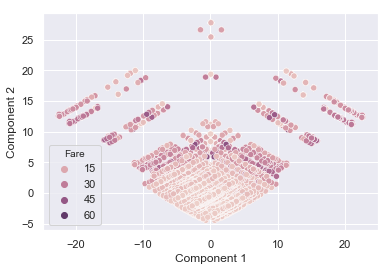

In [13]:
sns.scatterplot(x="Component 1", y = "Component 2", hue = "Fare", data = simd_pca)